#samples: 100, #features: 1
epoch: 100, loss: 306.4875
epoch: 200, loss: 92.8622
epoch: 300, loss: 83.5718
epoch: 400, loss: 83.1610
epoch: 500, loss: 83.1428
epoch: 600, loss: 83.1419
epoch: 700, loss: 83.1419
epoch: 800, loss: 83.1419
epoch: 900, loss: 83.1419
epoch: 1000, loss: 83.1419


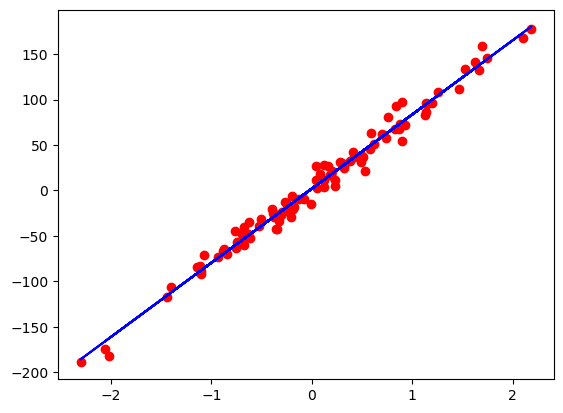

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# convert y into column vector
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')


# 1) Model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)

    loss = criterion(y_pred, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1)%100 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()